# Linear Regression Single Variable

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [69]:
df = pd.read_csv("./data/Housing.csv")
df = df[['area','price']]

In [70]:
%matplotlib inline

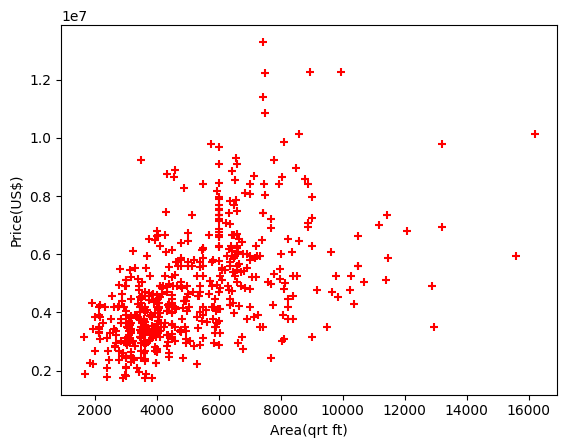

In [71]:
plt.xlabel('Area(qrt ft)')
plt.ylabel('Price(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [72]:
# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [73]:

model_lreg = linear_model.LinearRegression()
model_lreg.fit(train_df[['area']].values, train_df.price)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [74]:
area =[[3300]]
model_lreg.predict(area)

array([3917162.74235733])

In [75]:
model_lreg.coef_

array([425.72984194])

In [76]:
model_lreg.intercept_

np.float64(2512254.2639593435)

In [77]:
# y = mx + b
# price = m * area + b
y = (461.97489427*3300)+2387308.48239643
y

3911825.63348743

In [78]:
test_df.head(5)

,area,price
316,5900,4060000
77,6500,6650000
360,4040,3710000
90,5000,6440000
493,3960,2800000


In [79]:
ar = test_df[['area']].to_numpy()
predict_price = model_lreg.predict(ar)

In [80]:
test_df['predict_price'] = predict_price
test_df['predict_price'] = test_df['predict_price'].map('${:,.2f}'.format)
test_df

,area,price,predict_price
316,5900,4060000,"$5,024,060.33"
77,6500,6650000,"$5,279,498.24"
360,4040,3710000,"$4,232,202.83"
90,5000,6440000,"$4,640,903.47"
493,3960,2800000,"$4,198,144.44"
...,...,...,...
15,6000,9100000,"$5,066,633.32"
357,6930,3773000,"$5,462,562.07"
39,6000,7910000,"$5,066,633.32"
54,6000,7350000,"$5,066,633.32"


# Validate the Results

A. Statistical Accuracy (The Numbers)

We compare the y_test (actual prices) against the predictions (model's guesses).

In [ ]:
y_test = test_df[['price']]
print('R^2 Score:', metrics.r2_score(y_test, predict_price))
print('MAE:', metrics.mean_absolute_error(y_test, predict_price))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_price)))

R^2 Score: 0.27287851871974644
MAE: 1474748.1337969352
RMSE: 1917103.7021424233


B. Residual Analysis (The Visuals)

This is the most important "sanity check." We want to see if the errors (residuals) are random.

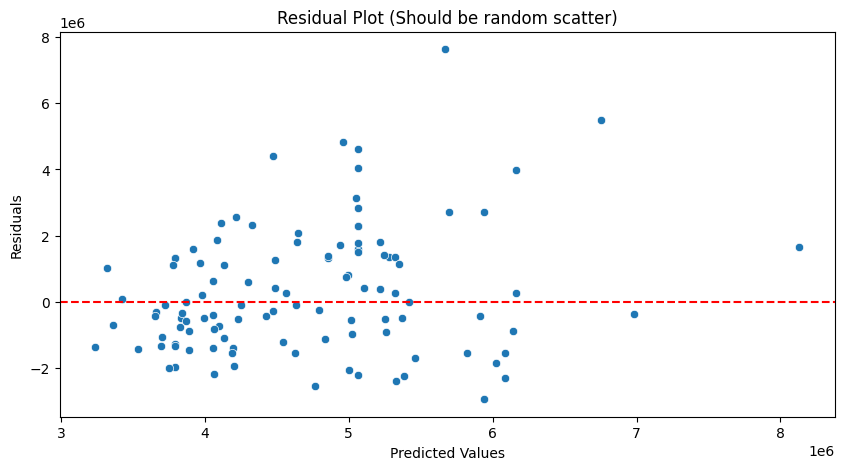

In [91]:
# Calculate Residuals
residuals = y_test.values.flatten() - predict_price.flatten()

# Plotting Residuals
plt.figure(figsize=(10, 5))
sns.scatterplot(x=predict_price.flatten(), y=residuals.flatten())
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Should be random scatter)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

C. Distribution of Errors

The errors should follow a normal distribution (the bell curve). If the histogram is skewed, your model might be missing a key variable.

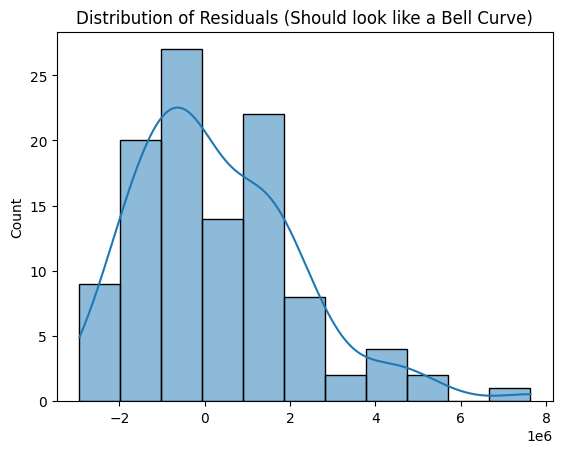

In [92]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Should look like a Bell Curve)')
plt.show()

Summary Checklist for Python Validation:

    R2 Score: Is it close to 1? (Ideally > 0.70 for most use cases).

    Residual Plot: Are the dots randomly scattered around the center line? If they form a shape, your model is biased.

    Train vs. Test: Is your error on the test set much higher than the training set? If so, you have overfitting.